<a href="https://colab.research.google.com/github/saisuryakeshetty/RNN_stock_price/blob/main/RNN_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 - Data Preprocessing

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization

### Importing the training set

In [ ]:
# Load stock prices from 2012 to 2016
dataset_train = pd.read_csv('/content/drive/MyDrive/Google_stock_price/Google_Stock_Price_Train.csv')

In [ ]:
# display the dataset(first 5 rows)
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
# get shape of the dataset
dataset_train.shape

(1258, 6)

In [ ]:
# Get an array of opening prices
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

Feature scaling helps speed up the process of convergence of gradient descent.

In [ ]:
# Scale the training_set such that values are in the range of [0,1]
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

Timesteps refers to how much behind data do you want to look into to make the prediction. Here we will predict next day stock price based on previous 60 days stock prices.

In [ ]:
# intilalize the X_train,y_train with empty lists
X_train = []
y_train = []
# start from 60th index position(61st stock price) on training_set and move 1 index repetitively
for i in range(60,1258):
  # append a list of previous 60 stock prices to X_train
  X_train.append(training_set[i-60:i])
  # append a list containing current stock price to y_train
  y_train.append(training_set[i,0])
# convert lists to arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# shape of X_train,y_train
X_train.shape,y_train.shape

((1198, 60, 1), (1198,))

## Building and Training the RNN

In building RNN model, we will use LSTM layers. These LSTM layers will help RNN model in capturing long term dependencies in addition to short term dependencies.

### Initialising the RNN

We will use 4 LSTM layers with 50 units each followed by Dropout layer. Dropout layer helps reducing overfitting.

In [ ]:
model = Sequential()

### Adding the first LSTM layer and Dropout layer

return_sequences = True will output all the hidden states in each timestep. We will set return_sequences = True for first 3 LSTM layers

In [ ]:
model.add(LSTM(50,input_shape=(60,1),return_sequences=True))
model.add(Dropout(0.2))

### Adding a second LSTM layer and and Dropout layer

In [ ]:
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))

### Adding a third LSTM layer and and Dropout layer

In [ ]:
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))

### Adding a fourth LSTM layer and and Dropout layer

In [ ]:
model.add(LSTM(50))
model.add(Dropout(0.2))

### Adding the output layer

In [ ]:
model.add(Dense(1))

### Compiling the RNN

We will use 'adam' optimizer. Our target variable, next day stock price is continuous variable so we will use 'mean_squared_error' loss function.

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
model.fit(X_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 144ms/step - loss: 0.0443
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0074
Epoch 3/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0043
Epoch 13/100
38/38 [

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of Jan 2017

In [ ]:
# Load Jan 2017 stock prices
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_stock_price/Google_Stock_Price_Test.csv')

In [ ]:
# get shape of the dataset_test
dataset_test.shape

(20, 6)

In [ ]:
# Get an array of Jan 2017 opening prices
real_stock_price = dataset_test.iloc[:,1:2].values

### Preprocessing testing data

In [ ]:
# concatenating open stock prices of dataset_train and dataset_test
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# obtain array containing stock prices of last 60 days in 2012-2016 and stock prices of Jan 2017
inputs = dataset_total[len(dataset_train)-60:].values
# convert 1D array to  2D array
inputs = inputs.reshape(-1,1)
# Scale the above array
inputs = sc.transform(inputs)
# intilalize the X_test with empty list
X_test = []
# start from 60th index position and move 1 index repetitively. This 60th index position on inputs corresponds to 1st stock price of Jan 2017
for i in range(60,len(inputs)):
# append a list of previous 60 stock prices to X_test
  X_test.append(inputs[i-60:i])
# convert list to array
X_test = np.array(X_test)

### Predicting stock price of 2017

In [ ]:
# get predictions for Jan 2017
predicted_stock_price = model.predict(X_test)
# scale back the predicted_stock_price
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 996ms/step


### Visualising the results

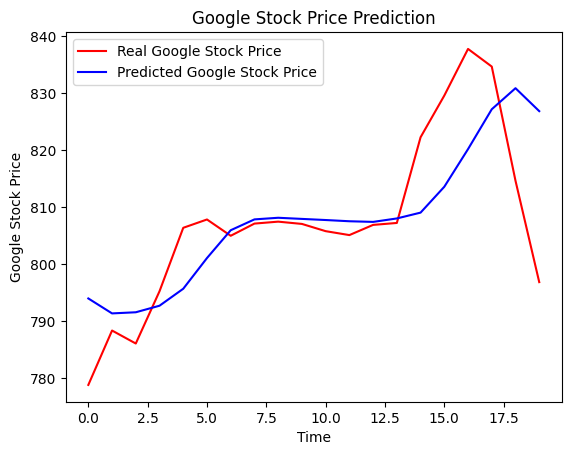

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()